In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [ ]:
np.random.seed(42)
years_exp = np.random.randint(1,11,100)
salary= 2000+(years_exp*2500)+np.random.normal(0,1000,100)
df=pd.DataFrame({"years_exp":years_exp,"salary":salary})

In [ ]:
x= df[['years_exp']]
y=df['salary']
print(df.head())

   years_exp        salary
0          7  18603.664817
1          4  11888.012179
2          8  23468.941285
3          5  13376.101665
4          7  20450.005396


In [ ]:
x=sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     5073.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.28e-86
Time:                        17:09:10   Log-Likelihood:                -832.73
No. Observations:                 100   AIC:                             1669.
Df Residuals:                      98   BIC:                             1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1909.5635    232.239      8.222      0.0

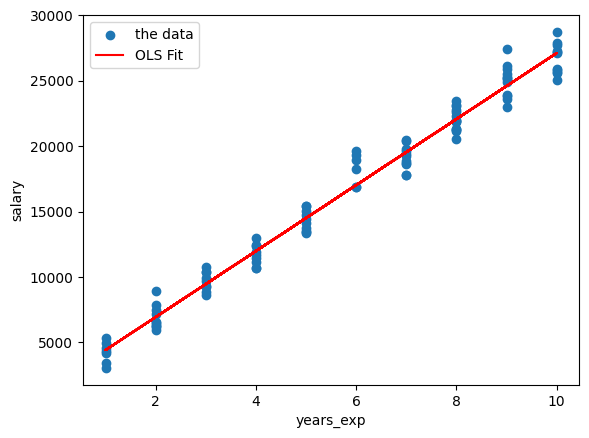

In [ ]:
plt.scatter(df['years_exp'],df['salary'],label='the data')
plt.plot(df['years_exp'], model.predict(x), color='red', label="OLS Fit")
plt.xlabel("years_exp")
plt.ylabel("salary")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [ ]:
a= df.drop(columns=["target"])
b=df["target"]

In [ ]:
a=sm.add_constant(a)

In [ ]:
model1 = sm.OLS(b,a).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.83e-62
Time:                        18:10:47   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

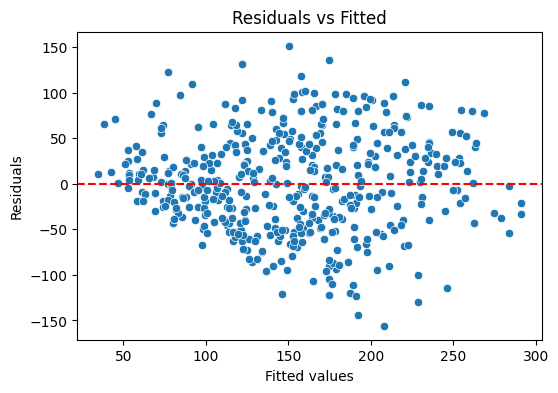

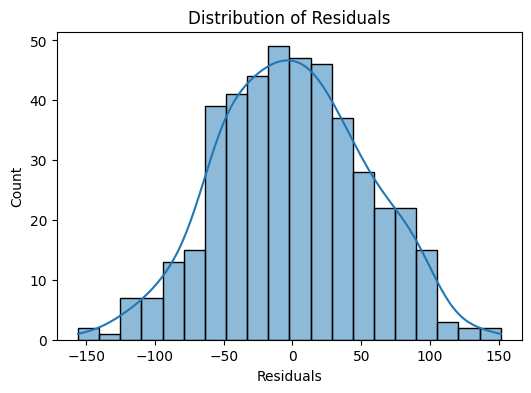

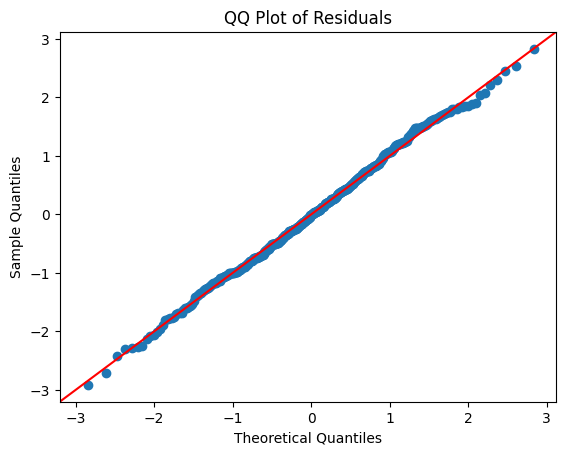

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
import pandas as pd

# Load diabetes dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Add constant for OLS intercept
X = sm.add_constant(X)

# Fit OLS
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# 1. Residuals vs Fitted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# 2. Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

# 3. QQ-plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()
